# ID3

# Introduction

The decision tree is a supervised lerning technique that is used for classification as well regression. The intuition behind the working of decision tree is fairly simple. It tries to create rules that identifies which class a data point belong to.

So, why Decision Trees?
- Decision tress often mimic the human level thinking so its so simple to understand the data and make some good interpretations.
- Decision trees actually make you see the logic for the data to interpret(not like black box algorithms like SVM,NN,etc..)

Let us see how.

For example if there are three classes of data, red, blue and yellow as given in the figure given below:
<img src='dt1.png'/>
They can be discreteley identified by drawing boundaries like:
<img src='dt2.png'/>

This can be extended to 'n' classes and more than two dimensions.
<br><br>
<b>
    A decision tree is a tree where each node represents a feature(attribute), each link(branch) represents a decision(rule) and each leaf represents an outcome(categorical or continues value).
    <br>
Decision Tree Classifier, repetitively divides the working area(plot) into sub part by identifying lines. 
</b>

On a real-world scenario, the possibility of a datapoint straying into a 'space' not occupied by its class is pretty high.
<br>
So, this kind of a behavior is accounted as impurity in the data.The challenge now lies in dealing with the impurity and drawing boundaries for each class.


## Entropy 
The measure of impurity is given by <b><i>entropy</b></i>.
It is mathematically given by the equation:
<img src='dt3.jpg'/>

p(x) is the probablity of event x to occur. In simple terms, this measure is going to tell us how <i>'impure'</i> is a feature towards classifying a point into a class.

## Information Gain

Suppose we have multiple features to divide the current working set. What feature should we select for division? Perhaps one that gives us less impurity.
Suppose we divide the classes into multiple branches as follows, the information gain at any node is defined as:
<br><br><b><i>
Information Gain (n) = Entropy(x) — ([weighted average] * entropy(children for feature))
</i></b><br><br>
Decision tree at every stage selects the one that gives best information gain. When information gain is 0 means the feature does not divide the working set at all.

<i>Steps:<br><i>
(1) compute the entropy for data-set.<br>
(2) for every attribute/feature:
        1. calculate entropy for all categorical values
        2. take average information entropy for the current attribute
        3. calculate gain for the current attribute
(3) pick the highest gain attribute.<br>
(4) Repeat until we get the tree we desired.

# Example

In [1]:
import pandas as pd
from pandas import np
import warnings
warnings.filterwarnings("ignore")

In [2]:
weather = (pd.read_csv('dtWeather.csv'))
weather

,Temp,Humidity,Windy,Outlook,Play
0,hot,high,False,sunny,no
1,hot,high,True,sunny,no
2,hot,high,False,overcast,yes
3,mild,high,False,rainy,yes
4,cool,normal,False,rainy,yes
5,cool,normal,True,rainy,no
6,cool,normal,True,overcast,yes
7,mild,high,False,sunny,no
8,cool,normal,False,sunny,yes
9,mild,normal,False,rainy,yes


Let's just take a famous dataset in the machine learning world which is weather dataset(playing game Y or N based on weather condition).

We have four X values (outlook,temp,humidity and windy) being categorical and one y value (play Y or N) also being categorical.

So we need to learn the mapping (what machine learning always does) between X and y.
This is a binary classification problem, lets build the tree using the ID3 algorithm
To create a tree, we need to have a root node first and we know that nodes are features/attributes(outlook,temp,humidity and windy),

So how do we choose the root?
- The answer is simple. The feature that provides the highest Information Gain

Compute the entropy for the weather data set:
<img src='dt3(1).jpg'/>
For every feature calculate the entropy and information gain:
<img src='dt4.jpg'/>
Similarity we can calculate for other two attributes(Humidity and Temp).
<br>Pick the highest gain attribute.
<img src='dt5.jpg'/>
So our root node is Outlook.
<img src='dt6.jpg'/>
Repeat the same thing for sub-trees till we get the tree.
<img src='dt7.jpg'/>
Finally we get the tree something like his.
<img src='dt8.jpg'/>

# Example implementation 

1. **Dataset used**: Balance Scale Weight & Distance Database.

2. **Relevant Information**: This data set was generated to model psychological experimental results.  Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced.  The attributes are the left weight, the left distance, the right weight, and the right distance.  The correct way to find the class is the greater of (left-distance x left-weight) and (right-distance x right-weight).  If they are equal, it is balanced.

3. **Number of Instances**: 625 (49 balanced, 288 left, 288 right)

4. **Number of Attributes**: 4 (numeric) + class name = 5

5. **Attribute Information**:
	1. Class Name: 3 (L, B, R)
	2. Left-Weight: 5 (1, 2, 3, 4, 5)
	3. Left-Distance: 5 (1, 2, 3, 4, 5)
	4. Right-Weight: 5 (1, 2, 3, 4, 5)
	5. Right-Distance: 5 (1, 2, 3, 4, 5)

6. **Missing Attribute Values**: 
	none

7. **Class Distribution**: 
   1. 46.08 percent are L
   2. 07.84 percent are B
   3. 46.08 percent are R

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from graphviz import Source
#graphviz: to visualize the tree
# sudo apt-get install graphviz : linux users
# brew install graphviz : macOS users
# pip install graphviz

/Users/adithya8.0.0/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# loading data
balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',header=None)
print ('shape:',balance_data.shape)
balance_data.head()

('shape:', (625, 5))


,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [5]:
X = balance_data.iloc[:, 1:5]
Y = balance_data.iloc[:,0]

In [6]:
# the train test split is used to randomly sample the data for training and testing
# in the given train-test ratio
X_train, X_test, y_train, y_test = train_test_split( X.values, Y.values, test_size = 0.3)

In [7]:
#limiting the size of the tree for display purposes
entropy = DecisionTreeClassifier(criterion = "entropy",max_depth=5,min_samples_leaf=5)
entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
print ('Accuracy:',entropy.score(X_test,y_test))

('Accuracy:', 0.7553191489361702)


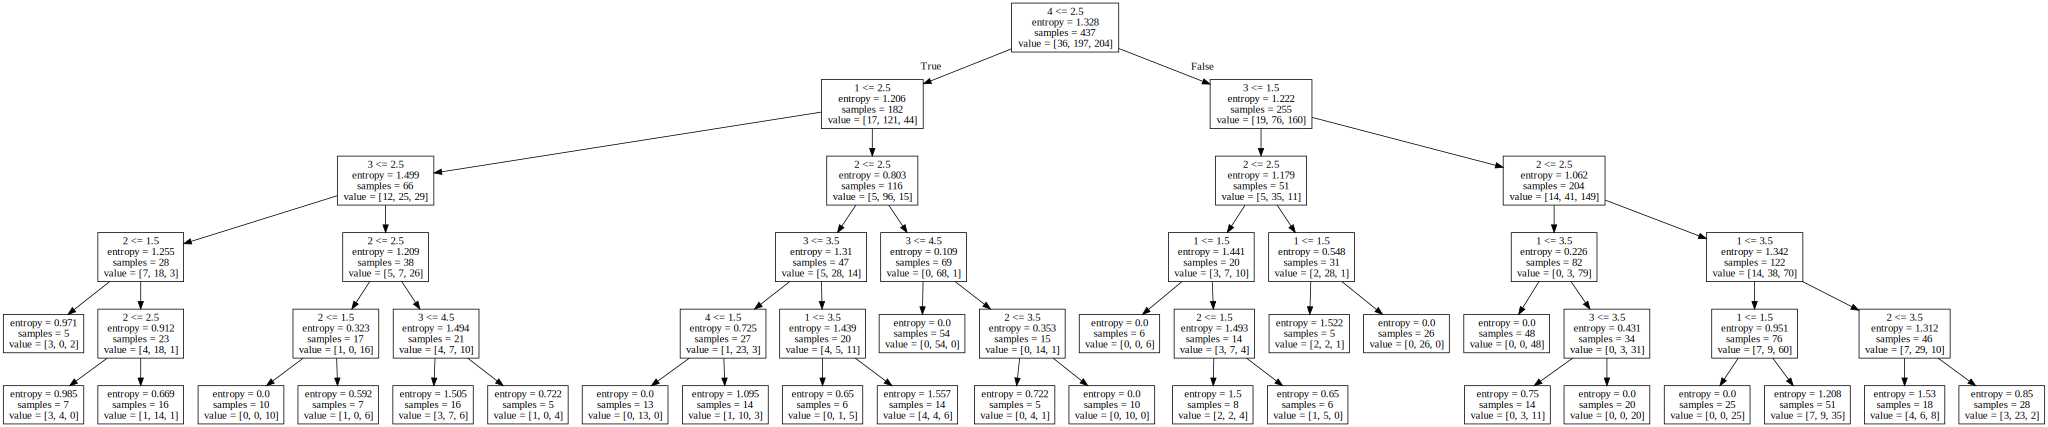

In [9]:
#visualizing the tree
from IPython.display import SVG

graph = Source( tree.export_graphviz(entropy, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))